In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import pysal
import shapely.geometry
from shapely.geometry import Point, Polygon

/Users/2nice/.virtualenvs/erstesVE/lib/python3.7/site-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://pysal.org/about
  ), VisibleDeprecationWarning)


# Erster Import

In [2]:
#Importieren wir die vorgefertige Weltkarte
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

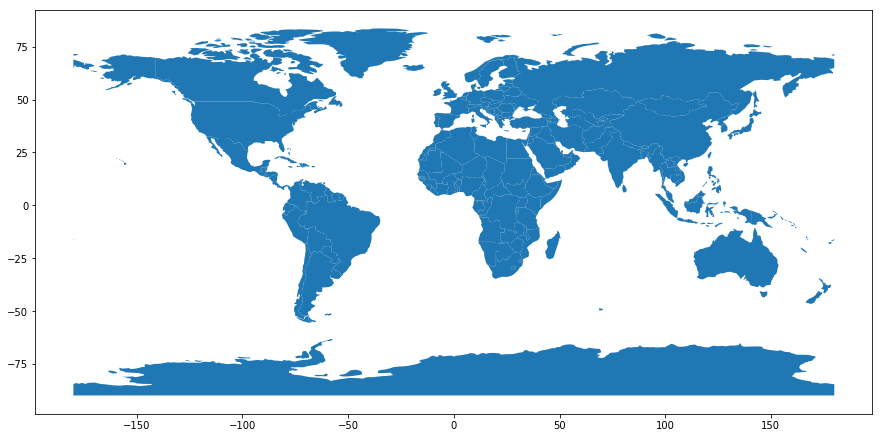

In [3]:
world.plot(figsize=(15,10))
plt.savefig('test.pdf')

In [4]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...
5,2967004.0,Asia,Armenia,ARM,18770.0,"POLYGON ((43.58274580259273 41.09214325618257,..."
6,3802.0,Antarctica,Antarctica,ATA,760.4,(POLYGON ((-59.57209469261153 -80.040178725096...
7,140.0,Seven seas (open ocean),Fr. S. Antarctic Lands,ATF,16.0,"POLYGON ((68.935 -48.62500000000001, 69.58 -48..."
8,21262641.0,Oceania,Australia,AUS,800200.0,(POLYGON ((145.3979781434948 -40.7925485166058...
9,8210281.0,Europe,Austria,AUT,329500.0,"POLYGON ((16.97966678230404 48.12349701597631,..."


In [5]:
pd.set_option('display.max_colwidth',-1)# -1 bedeutet: bis zur letzten spalte

In [6]:
world

pop_est                continent                    name iso_a3  \
0    28400000.0   Asia                     Afghanistan             AFG     
1    12799293.0   Africa                   Angola                  AGO     
2    3639453.0    Europe                   Albania                 ALB     
3    4798491.0    Asia                     United Arab Emirates    ARE     
4    40913584.0   South America            Argentina               ARG     
5    2967004.0    Asia                     Armenia                 ARM     
6    3802.0       Antarctica               Antarctica              ATA     
7    140.0        Seven seas (open ocean)  Fr. S. Antarctic Lands  ATF     
8    21262641.0   Oceania                  Australia               AUS     
9    8210281.0    Europe                   Austria                 AUT     
10   8238672.0    Asia                     Azerbaijan              AZE     
11   8988091.0    Africa                   Burundi                 BDI     
12   10414336.0   Europe                   Belgium                 BEL     
13   8791832.0    Africa                   Benin                   BEN     
14   15746232.0   Africa                   Burkina Faso            BFA     
15   156050883.0  Asia                     Bangladesh              BGD     
16   7204687.0    Europe                   Bulgaria                BGR     
17   309156.0     North America            Bahamas                 BHS     
18   4613414.0    Europe                   Bosnia and Herz.        BIH     
19   9648533.0    Europe                   Belarus                 BLR     
20   307899.0     North America            Belize                  BLZ     
21   9775246.0    South America            Bolivia                 BOL     
22   198739269.0  South America            Brazil                  BRA     
23   388190.0     Asia                     Brunei                  BRN     
24   691141.0     Asia                     Bhutan                  BTN     
25   1990876.0    Africa                   Botswana                BWA     
26   4511488.0    Africa                   Central African Rep.    CAF     
27   33487208.0   North America            Canada                  CAN     
28   7604467.0    Europe                   Switzerland             CHE     
29   16601707.0   South America            Chile                   CHL     
..          ...             ...              ...                   ...     
147  7379339.0    Europe                   Serbia                  SRB     
148  481267.0     South America            Suriname                SUR     
149  5463046.0    Europe                   Slovakia                SVK     
150  2005692.0    Europe                   Slovenia                SVN     
151  9059651.0    Europe                   Sweden                  SWE     
152  1123913.0    Africa                   Swaziland               SWZ     
153  20178485.0   Asia                     Syria                   SYR     
154  10329208.0   Africa                   Chad                    TCD     
155  6019877.0    Africa                   Togo                    TGO     
156  65905410.0   Asia                     Thailand                THA     
157  7349145.0    Asia                     Tajikistan              TJK     
158  4884887.0    Asia                     Turkmenistan            TKM     
159  1131612.0    Asia                     Timor-Leste             TLS     
160  1310000.0    North America            Trinidad and Tobago     TTO     
161  10486339.0   Africa                   Tunisia                 TUN     
162  76805524.0   Asia                     Turkey                  TUR     
163  22974347.0   Asia                     Taiwan                  TWN     
164  41048532.0   Africa                   Tanzania                TZA     
165  32369558.0   Africa                   Uganda                  UGA     
166  45700395.0   Europe                   Ukraine                 UKR     
167  3494382.0    South America            Uruguay       

In [7]:
#die letzte Spalte zeigt an, wo die Grenzlinie einen Knick macht. Auf Google checken!
#zuerst longitute, dann latitude

In [8]:
pd.set_option('display.max_colwidth',50) #hier zeigen wir wieder nur 50 Zeichen an


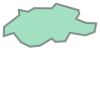

In [9]:
world['geometry'][28]

/Users/2nice/.virtualenvs/erstesVE/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


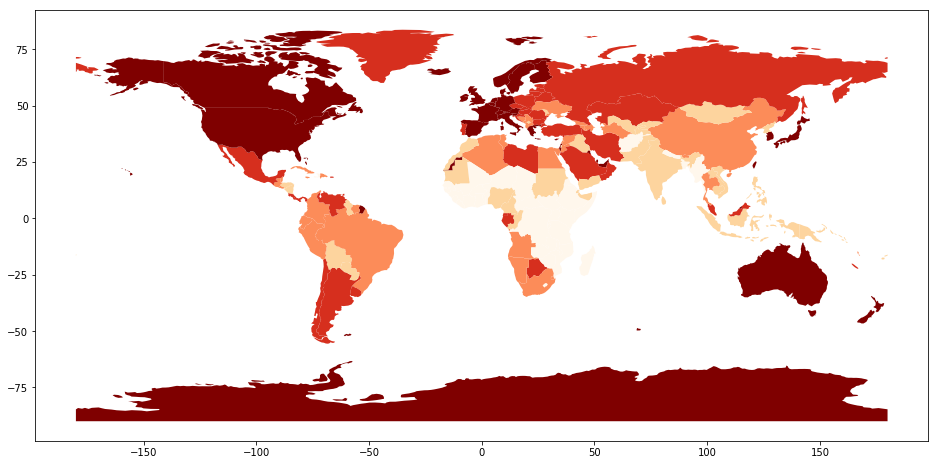

In [10]:
world['gdp_per_cap'] = world['gdp_md_est'] / world['pop_est'] #wir teilen 
world['gdp_per_cap'] = world['gdp_per_cap'] * 1000

world.plot(column='gdp_per_cap', cmap='OrRd', scheme='quantiles', figsize=(16, 20));
plt.savefig('welt.pdf')


In [12]:
!open('welt.pdf')

/bin/sh: -c: line 0: syntax error near unexpected token `'welt.pdf''
/bin/sh: -c: line 0: `open('welt.pdf')'


In [13]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_cap
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,...",0.784155
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...,8.617663
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,...",5.992659
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,...",38.407908
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...,14.027126
5,2967004.0,Asia,Armenia,ARM,18770.0,"POLYGON ((43.58274580259273 41.09214325618257,...",6.326247
6,3802.0,Antarctica,Antarctica,ATA,760.4,(POLYGON ((-59.57209469261153 -80.040178725096...,200.000000
7,140.0,Seven seas (open ocean),Fr. S. Antarctic Lands,ATF,16.0,"POLYGON ((68.935 -48.62500000000001, 69.58 -48...",114.285714
8,21262641.0,Oceania,Australia,AUS,800200.0,(POLYGON ((145.3979781434948 -40.7925485166058...,37.634083
9,8210281.0,Europe,Austria,AUT,329500.0,"POLYGON ((16.97966678230404 48.12349701597631,...",40.132609


In [14]:
world.crs

{'init': 'epsg:4326'}

# Arbeiten wir mit der Schweiz

In [15]:
ch = gpd.read_file("shapePLZ/plz_verzeichnis_v2.shp") #
#https://map.geo.admin.ch/?lang=en&topic=ech&bgLayer=ch.swisstopo.pixelkarte-farbe&layers=ch.swisstopo.zeitreihen,ch.bfs.gebaeude_wohnungs_register,ch.bav.haltestellen-oev,ch.swisstopo.swisstlm3d-wanderwege,ch.swisstopo.swissboundaries3d-gemeinde-flaeche.fill&layers_visibility=false,false,false,false,true&layers_timestamp=18641231,,,,&catalogNodes=457,510

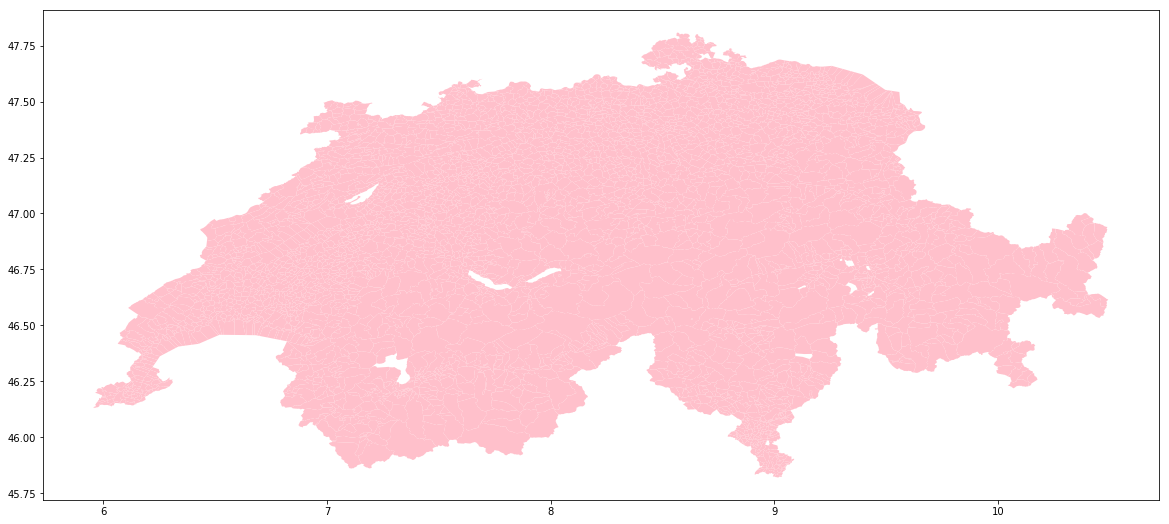

In [18]:
ch.plot(figsize=(20,10), color='pink')
plt.savefig('switzerland.pdf')

In [27]:
df = pd.read_csv('italrest_top10cities.csv')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1838 entries, 0 to 1837
Data columns (total 6 columns):
Unnamed: 0    1838 non-null int64
Addresse      1838 non-null object
Lat           1838 non-null float64
Lng           1838 non-null float64
Name          1838 non-null object
Rating        1838 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 86.2+ KB


In [29]:
df.head()

,Unnamed: 0,Addresse,Lat,Lng,Name,Rating
0,0,"In Gassen 6, 8001 Zürich, Switzerland",47.370705,8.540779,Bindella,4.3
1,1,"Augustinergasse 25, 8001 Zürich, Switzerland",47.372218,8.538797,Cantinetta Antinori,4.3
2,2,"Dufourstrasse 1, 8008 Zürich, Switzerland",47.364525,8.547443,Conti,4.3
3,3,"Nansenstrasse 9, 8050 Zürich, Switzerland",47.410710,8.544784,Mamma Mia,3.9
4,4,"Zeughausstrasse 61, 8004 Zürich, Switzerland",47.376371,8.529278,Italia,4.3


In [31]:
# Step 1: Funktion, um einen Punkt zu machen
def make_point(row):
    return Point(row['Lng'], row['Lat'])

# Step 2: Den Punkt machen
df['Points'] = df.apply(make_point, axis=1)#immer wenn man in DataFrame zwei Zellen berücksivhtih, muss man Axes mitgebien

In [32]:
df.head()

,Unnamed: 0,Addresse,Lat,Lng,Name,Rating,Points
0,0,"In Gassen 6, 8001 Zürich, Switzerland",47.370705,8.540779,Bindella,4.3,POINT (8.5407788 47.3707055)
1,1,"Augustinergasse 25, 8001 Zürich, Switzerland",47.372218,8.538797,Cantinetta Antinori,4.3,POINT (8.5387974 47.37221760000001)
2,2,"Dufourstrasse 1, 8008 Zürich, Switzerland",47.364525,8.547443,Conti,4.3,POINT (8.547442799999999 47.364525)
3,3,"Nansenstrasse 9, 8050 Zürich, Switzerland",47.410710,8.544784,Mamma Mia,3.9,POINT (8.544783899999999 47.41071029999999)
4,4,"Zeughausstrasse 61, 8004 Zürich, Switzerland",47.376371,8.529278,Italia,4.3,POINT (8.529277699999998 47.3763708)


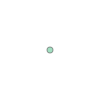

In [33]:
df['Points'][0]

In [36]:
italrests = gpd.GeoDataFrame(df, geometry=list(df['Points']))
italrests.to_csv('italrests.csv', index=False)

In [37]:
italrests

,Unnamed: 0,Addresse,Lat,Lng,Name,Rating,Points,geometry
0,0,"In Gassen 6, 8001 Zürich, Switzerland",47.370705,8.540779,Bindella,4.3,POINT (8.5407788 47.3707055),POINT (8.5407788 47.3707055)
1,1,"Augustinergasse 25, 8001 Zürich, Switzerland",47.372218,8.538797,Cantinetta Antinori,4.3,POINT (8.5387974 47.37221760000001),POINT (8.5387974 47.37221760000001)
2,2,"Dufourstrasse 1, 8008 Zürich, Switzerland",47.364525,8.547443,Conti,4.3,POINT (8.547442799999999 47.364525),POINT (8.547442799999999 47.364525)
3,3,"Nansenstrasse 9, 8050 Zürich, Switzerland",47.410710,8.544784,Mamma Mia,3.9,POINT (8.544783899999999 47.41071029999999),POINT (8.544783899999999 47.41071029999999)
4,4,"Zeughausstrasse 61, 8004 Zürich, Switzerland",47.376371,8.529278,Italia,4.3,POINT (8.529277699999998 47.3763708),POINT (8.529277699999998 47.3763708)
5,5,"Luisenstrasse 40, 8005 Zürich, Switzerland",47.384228,8.530403,Cucina,4.2,POINT (8.530403 47.384228),POINT (8.530403 47.384228)
6,6,"Ohmstrasse 11, 8050 Zürich, Switzerland",47.410185,8.545875,Concerto,4.2,POINT (8.545874999999999 47.41018520000001),POINT (8.545874999999999 47.41018520000001)
7,7,"Stampfenbachstrasse 8, 8001 Zürich, Switzerland",47.377759,8.543813,Commihalle,4.1,POINT (8.543813 47.377759),POINT (8.543813 47.377759)
8,8,"Niederdorfstrasse 33, 8001 Zürich, Switzerland",47.374671,8.543708,Tre Cucine,3.8,POINT (8.543707800000002 47.3746714),POINT (8.543707800000002 47.3746714)
9,9,"Waaggasse 5/7, 8001 Zürich, Switzerland",47.370103,8.539890,Santa Lucia,4.1,POINT (8.539889500000001 47.3701028),POINT (8.539889500000001 47.3701028)


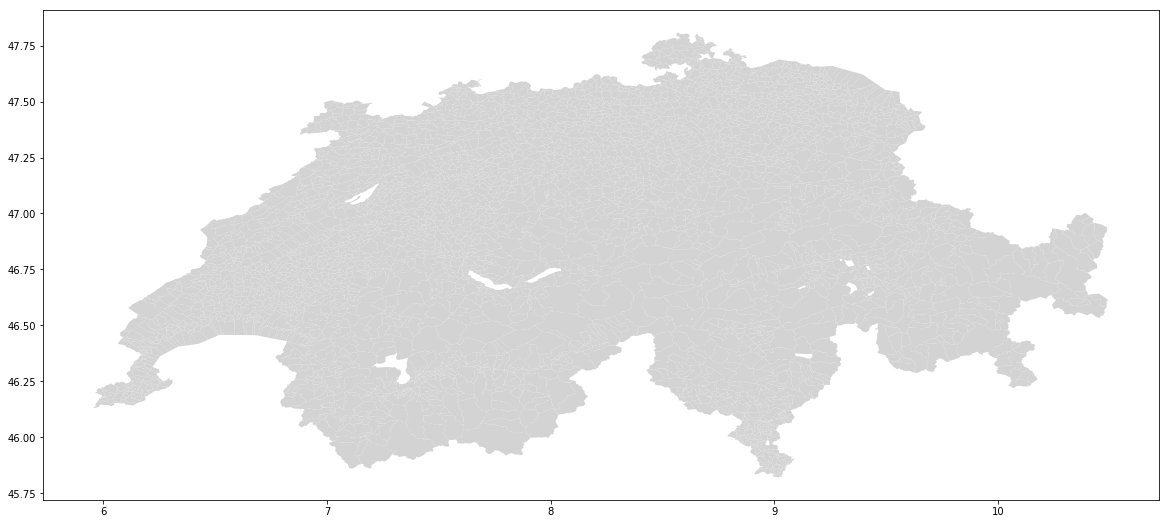

In [38]:
ch.plot(figsize=(20,20), color='lightgrey')

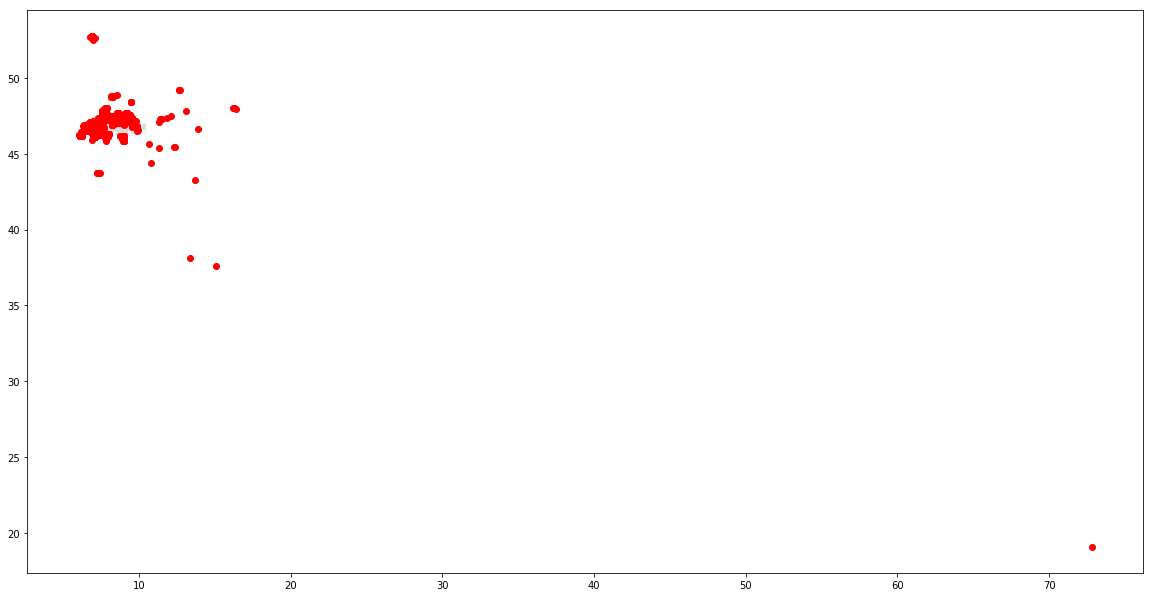

In [39]:
ax = ch.plot(figsize=(20,20), color='lightgrey') #ax ist schwiez
italrests.plot(ax=ax, color='red')

# Koordinaten abschneiden, um Schweiz rauszufiltern

In [40]:
italrests = italrests[italrests['Lat'] < 48]
italrests = italrests[italrests['Lat'] > 45]
italrests = italrests[italrests['Lng']>6]
italrests = italrests[italrests['Lng']<11]

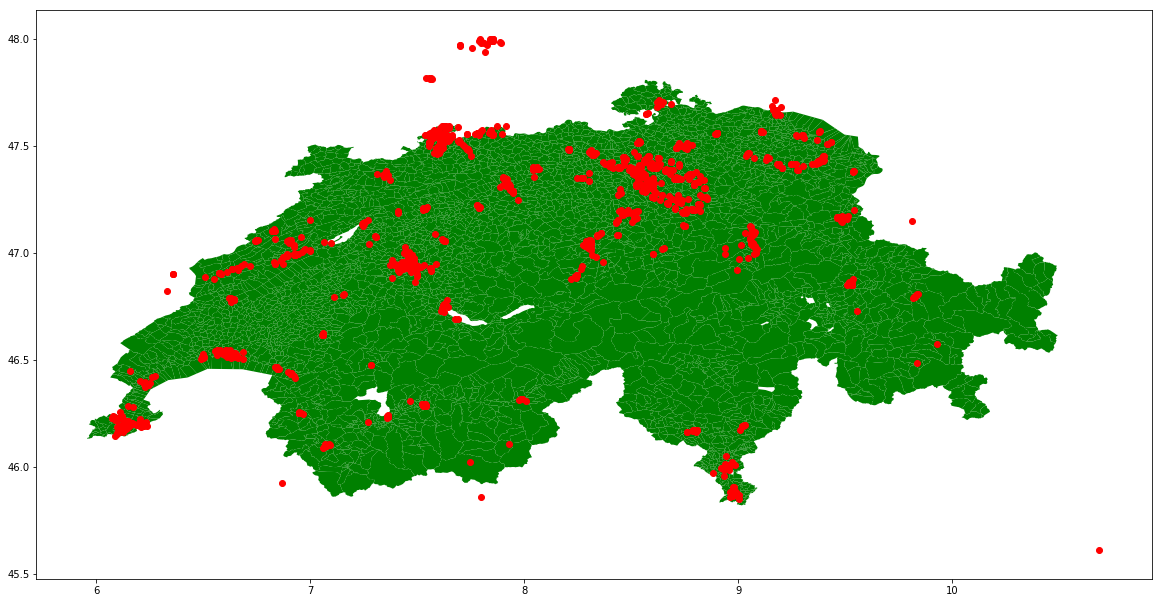

In [41]:
ax = ch.plot(figsize=(20,20), color='green')
italrests.plot(ax=ax, color='red')

# SpatialJoin

In [42]:
ch.crs = {'init' :'epsg:4326'} #hier stelle ich sicher,dass die Projektionen gleich sind, ist eine Standard-Projektion der Welt
italrests.crs = {'init' :'epsg:4326'}

In [45]:
ch = ch.dropna()

In [46]:
ch_with_italrests = gpd.sjoin(italrests, ch, how="inner", op='intersects')

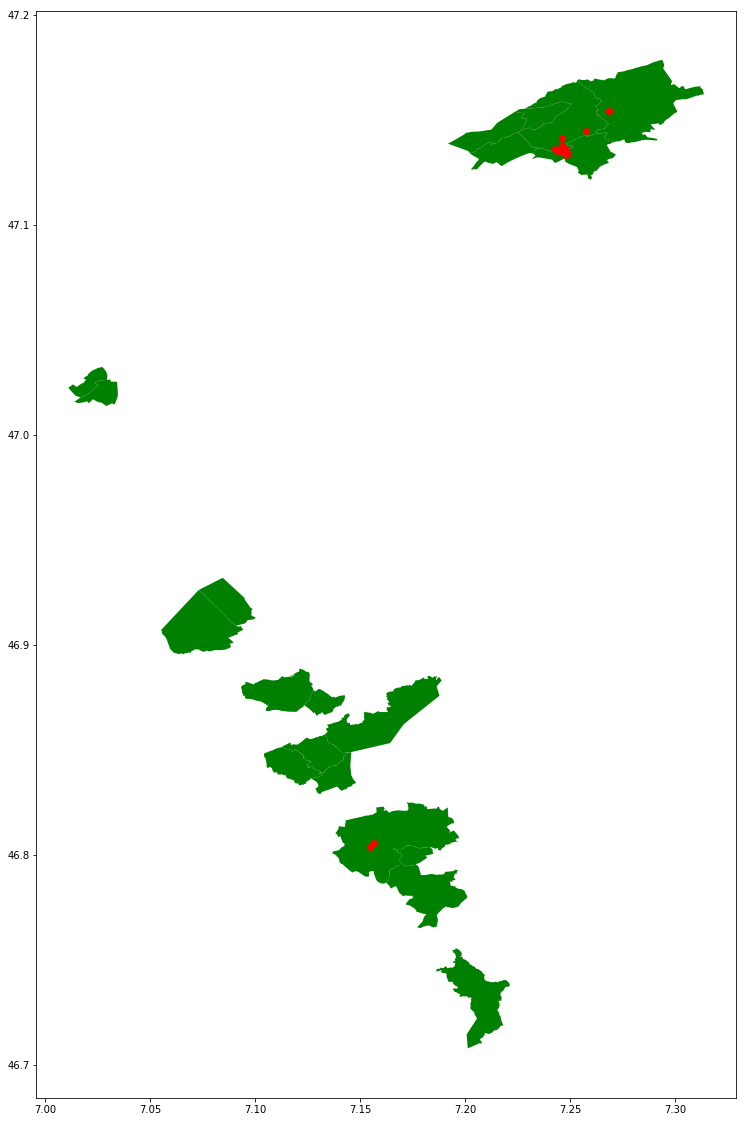

In [47]:
ax = ch.plot(figsize=(20,20), color='green')
ch_with_italrests.plot(ax=ax, color='red')

In [ ]:
ax = ch.plot(figsize=(20,20), color='green')
ch_with_italrests.plot(ax=ax, color='red', marker='.')

# Schauen wir uns Zürich an

In [ ]:
#https://statistik.zh.ch/internet/justiz_inneres/statistik/de/daten/Raeumliche_Daten/Basiskarten.html
zh = gpd.read_file("GEN_A4_GEMEINDEN_SEEN_2018_F/GEN_A4_GEMEINDEN_2018_F.shp")

In [ ]:
zh.crs = {'init' :'epsg:3857'}
italrests.crs = {'init' :'epsg:3857'}

In [ ]:
zh_with_italrests = gpd.sjoin(italrests, zh, how="inner", op='intersects')

In [ ]:
zh.plot(figsize=(10,10), color='green')


In [ ]:
zh.crs = {'init' :'epsg:4326'}

In [ ]:
zh.crs

In [ ]:
from shapely.geometry import Point, Polygon

In [ ]:
zh = gpd.read_file("GEN_A4_GEMEINDEN_SEEN_2018_F_WGS84_.geojson")

In [ ]:
zh_with_italrests = gpd.sjoin(italrests, zh, how="inner", op='intersects')
zh.crs = {'init' :'epsg:4326'}
italrests.crs = {'init' :'epsg:4326'}

In [ ]:
ax = zh.plot(figsize=(10,10), color='grey')
zh_with_italrests.plot(ax=ax, color='red', marker=".")